# Sparse GP w. MiniBatches

In [49]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from variational import SVGP, VGP
import GPy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data

In [47]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 0.5
n_train = 1_000
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)
y += 3 * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]

In [48]:
def plot_results():
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - y_std).squeeze(), 
                     (y_gpr + y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    plt.title('GPR versus Kernel Ridge')
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

## Model I - Variational GP

In [51]:
n_restarts = 0
max_iters  = 1_000
verbose    = 1

gpr_clf = VGP(
    verbose=verbose,
    n_restarts=n_restarts,
    max_iters=max_iters,
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    02s50  0009   3.673824e+04   2.978922e+09 
    07s45  0022   1.196472e+04   1.046830e+09 
    10s73  0032   5.094549e+03   1.216403e+08 
    14s20  0045   1.970769e+03   8.292823e+06 
    17s62  0056   1.383159e+03   3.689164e+05 
    21s11  0068   1.337718e+03   2.953739e+03 
    23s62  0075   1.337408e+03   9.404082e+02 
 01m00s78  0213   1.331328e+03   3.912560e+02 
 01m06s31  0235   1.330941e+03   2.453640e+02 
 02m02s91  0451   1.330663e+03   4.975571e+01 
 06m13s90  1261   1.330517e+03   2.709209e+00 
 06m39s63  1343   1.330515e+03   2.698463e+00 
Runtime:  06m39s63
Optimization status: None

KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

In [52]:
gpr_clf.display_model()

AttributeError: 'VGP' object has no attribute 'gp_model'

In [ ]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

In [ ]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

## Model I - Sparse Variational GP

In [43]:
n_inducing = 100
n_restarts = 0
max_iters  = 1_000
verbose    = 1
batch_size = 50

gpr_clf = SVGP(
    verbose=verbose,
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    batch_size=batch_size,
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s08  0001   7.067235e+04           nan 
    00s16  0002   7.067235e+04   5.182495e+09 
    01s18  0015   3.002188e+03   1.107113e+06 
    03s28  0043   2.560124e+03   2.985646e-02 
    04s07  0055   2.560124e+03   9.990576e-05 
Runtime:     04s07
Optimization status: converged - relative reduction in objective



In [44]:
gpr_clf.display_model()

sparse_gp.,value,constraints,priors
inducing inputs,"(100, 1)",,
rbf.variance,0.8151072242921877,+ve,
rbf.lengthscale,1.77416897830968,+ve,
Gaussian_noise.variance,0.7398064699613228,+ve,


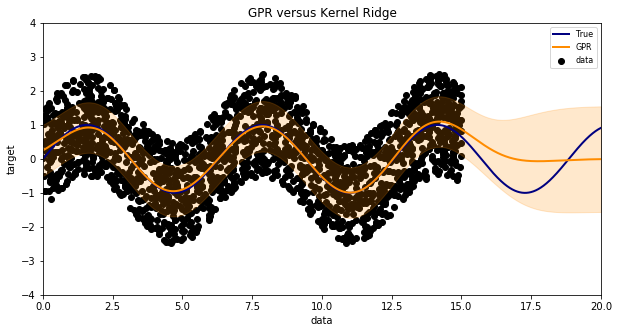

In [45]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

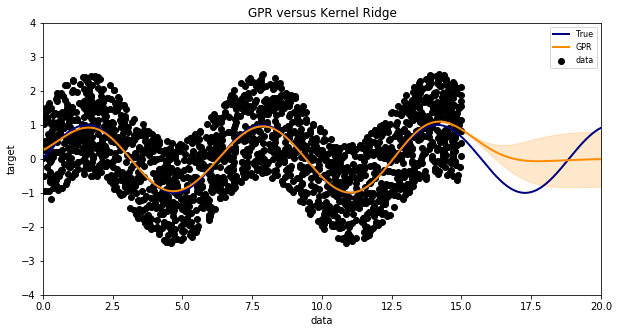

In [46]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()